# This is week 05 activities.
---
## Goal
In this in-class quiz, you will learn:  

* Regression -- Linear Regression and Polynomial Regression  

## Introduction 
In this week, we will take electron neutrino showering data from the Oscillation Project with Emulsion-tRacking Apparatus (OPERA) for regression task.  

Scikit-learn package: LinearRegression and PolynomialFeatures will help us learn the precedure of neutrino energy regression.  

Our data contain `Ntotal`, `Nmax`, `izmax` and `Energy`.  

* `Energy`: Electron neutrino energy

* `Ntotal`: Total number of hits

* `Nmax`: Max hit multiplicity in one layer

* `izmax`: Depth of shower max

## Action item
We will start from the fitting with polynomial function then show what overfitting is.  

At last, we will introduce how to use regularizers to prevent underfitting.  

## References 

Ref. [OPERA - 1](https://en.wikipedia.org/wiki/OPERA_experiment)

Ref. [OPERA - 2](https://arxiv.org/pdf/1109.4897.pdf)

Ref. [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Ref. [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

Ref. [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Ref. [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Ref. [Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

This is the schematic picture of particle shower.

![particle shower](http://w3.lnf.infn.it/wp-content/uploads/2018/06/fig3.png)




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import sklearn 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-week05/neutrino.npz
/kaggle/input/phys591000-week05/pseudo_data.npz
/kaggle/input/phys591000-week05/neutrino_train.npz
/kaggle/input/phys591000-week05/neutrino_test.npz


## Example 1 

File's contents:  ['x1', 'x2', 'x3', 'y']


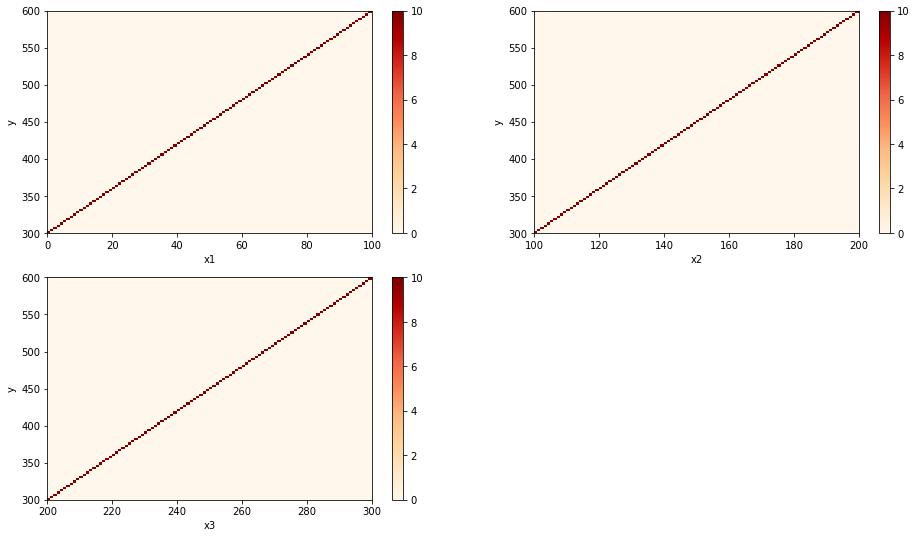

In [2]:
"""
We can use numpy and matplotlib to load and visualize our pseudo-data set.
This cell teach you how to load data and inspect dataset.
"""

"""
load pseudo data
"""

file = np.load("/kaggle/input/phys591000-week05/pseudo_data.npz", allow_pickle=True)

print("File's contents: ", file.files)


"""
visualize data to show relations in "x1" v.s "y", "x2" v.s "y" and "x3" v.s "y".
"""

# x_axis = np.linspace(100,1100,100)
# rng = np.random.RandomState(0)
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.hist2d( file["x1"], file["y"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("y")
plt.xlabel("x1")
plt.subplot(2,2,2)
plt.hist2d( file["x2"], file["y"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("y")
plt.xlabel("x2")
plt.subplot(2,2,3)
plt.hist2d( file["x3"], file["y"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("y")
plt.xlabel("x3")
plt.show()

# Exercise 1

content_names ['Energy', 'Ntotal', 'Nmax', 'izmax']


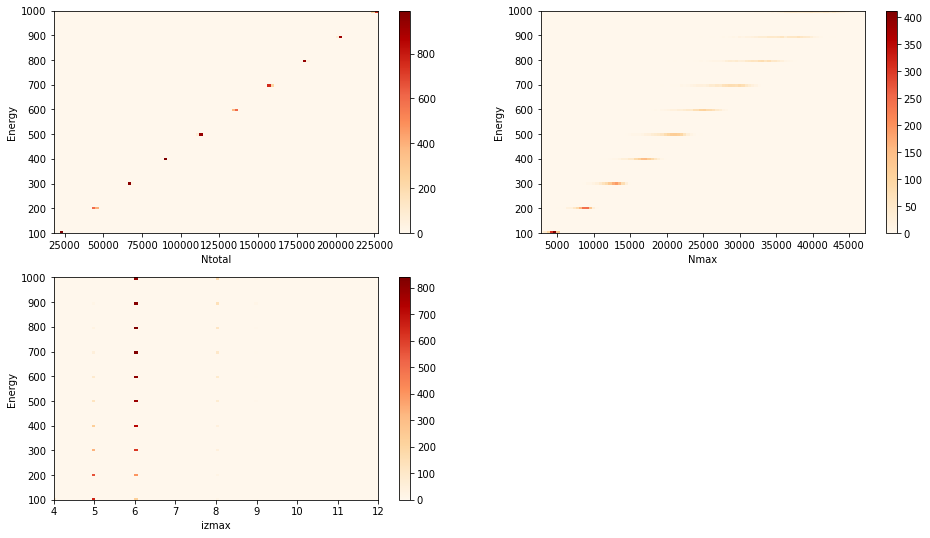

Quiz 01 is passed!
Please rise your hand and let TA check your figures! 


In [3]:
"""
Please load "/kaggle/input/phys591000-week05/neutrino.npz".
Print content names for this data set.
Please make 3 figures: "Ntotal" v.s "Energy", "Nmax" v.s "Energy" and "izmax" v.s "Energy".
"""
################################################################################################################
#Your code in this section


"""
load pseudo data
"""

neutrino_file = np.load("/kaggle/input/phys591000-week05/neutrino.npz", allow_pickle=True)

content_names = neutrino_file.files

print("content_names", content_names)



"""
visualize data to show relations in "Ntotal" v.s "Energy", "Nmax" v.s "Energy" and "izmax" v.s "Energy".
"""

plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
plt.hist2d( neutrino_file["Ntotal"], neutrino_file["Energy"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("Energy")
plt.xlabel("Ntotal")
plt.subplot(2,2,2)
plt.hist2d( neutrino_file["Nmax"], neutrino_file["Energy"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("Energy")
plt.xlabel("Nmax")
plt.subplot(2,2,3)
plt.hist2d( neutrino_file["izmax"], neutrino_file["Energy"], cmap='OrRd', bins=100)
plt.colorbar()
plt.ylabel("Energy")
plt.xlabel("izmax")
plt.show()










################################################################################################################
# Check your result is correct or not.
assert len(neutrino_file) == 4, print(f"Your array is not match the request.")

print("Quiz 01 is passed!")
print("Please rise your hand and let TA check your figures! ")

# Example 2

[3.00000000e+02 3.00000000e+00 5.60940183e-14 0.00000000e+00]


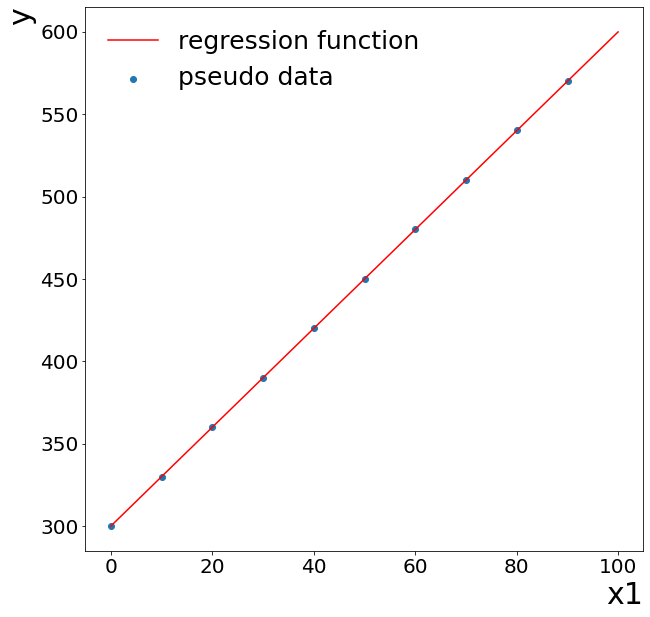

In [4]:
"""
We use scikit-learn package: "PolynomialFeatures" to fit the pseudo-data to get polynomial features.
Then, we use scikit-learn package: "LinearRegression" to fit those polynomial features to get the coefficient for each order.
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline


"""
Using Pipeline to collect two regressions methods.
"""
pseudo_model_poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])

# model_LRR = Pipeline([('poly', PolynomialFeatures(degree=5)),
#                 ('linear', Lasso(alpha=1))])

# model_LRR_1 = Pipeline([('poly', PolynomialFeatures(degree=5)),
#                 ('linear', Lasso(alpha=.4))])

"""
Pick some but not all data for fitting.
"""
wanted_point = np.arange(0,1000, 100) # 10 data points
pseudo_y = file["y"][wanted_point]
pseudo_x = file["x1"][wanted_point]


"""
Fit regression model
"""
pseudo_result_poly = pseudo_model_poly.fit(pseudo_x[:, np.newaxis], pseudo_y)  


"""
Take coefficients
"""
pseudo_coef = pseudo_result_poly.named_steps['linear'].coef_

print(pseudo_coef)


"""
visualize data in "x1" and "y" plane
"""


fig, ax = plt.subplots(1,1, figsize=(10,10))

pseudo_x_axis = np.linspace(0,np.max(file["x1"]),100) 
pseudo_pred = pseudo_coef[0]\
       + pseudo_x_axis*pseudo_coef[1]\
       + pseudo_coef[2]*pseudo_x_axis**2\
       + pseudo_coef[3]*pseudo_x_axis**3\
#        + pseudo_coef[4]*pseudo_x_axis**4\
#        + pseudo_coef[5]*pseudo_x_axis**5

plt.plot(pseudo_x_axis, pseudo_pred, 'r',label="regression function")
plt.scatter(pseudo_x, pseudo_y, label="pseudo data")

plt.xlabel("x1", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("y", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()

# Exercise 2

[ 1.62211008e-07  4.43935415e-03 -2.55340711e-10  6.62664368e-16]


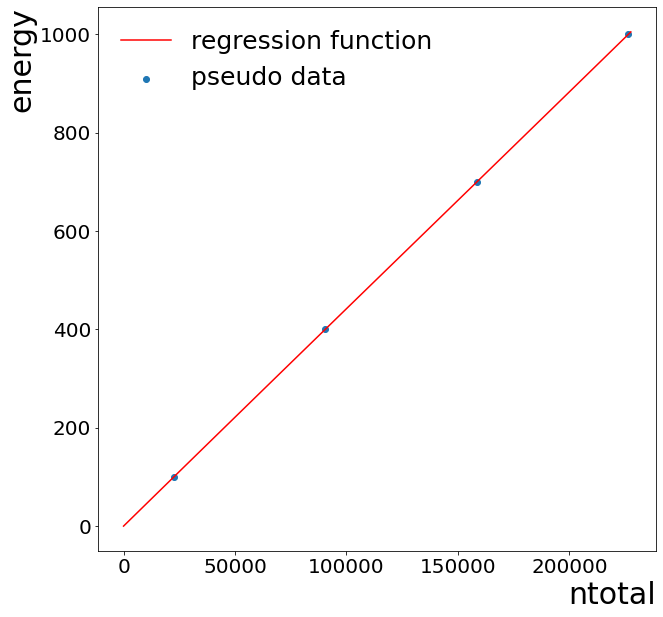

Quiz 02 is passed!
Please rise your hand and let TA check your figures! 


In [5]:
"""
Please use scikit-learn package: "PolynomialFeatures" to fit Ntotal and Energy to get polynomial features.
Then, please use scikit-learn package: "LinearRegression" to fit those polynomial features to get the coefficient for each order.
Please pick events in No.106, No.3106, No.6106 and No.9106 for your fitting 
(e.g. file["features"][[105, 3105, 6105, 9105]]])
"""
################################################################################################################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
#Your code in this section


"""
Using Pipeline to collect two regressions methods.
"""
neutrino_model_poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])

#neutrino_model_poly = Pipeline([('poly', PolynomialFeatures(degree=5)),
#                 ('linear', Lasso(alpha=1))])

# model_LRR_1 = Pipeline([('poly', PolynomialFeatures(degree=5)),
#                 ('linear', Lasso(alpha=.4))])

"""
Pick some but not all data for fitting.
Please select "Ntotal" and "Energy" information for fitting.
"""
ntotal = neutrino_file["Ntotal"][[105, 3105, 6105, 9105]]
energy = neutrino_file["Energy"][[105, 3105, 6105, 9105]]


"""
Fit regression model
"""
neutrino_result_poly = neutrino_model_poly.fit(ntotal[:, np.newaxis], energy)

"""
Take coefficients
"""
coef = neutrino_result_poly.named_steps['linear'].coef_
print(coef)

"""
visualize data in "Ntotal" and "Energy" plane
"""
fig, ax = plt.subplots(1,1, figsize=(10,10))

ntotal_axis = np.linspace(0,np.max(neutrino_file["Ntotal"]),100) 
neutrino_pred = coef[0]\
       + ntotal_axis*coef[1]\
       + coef[2]*ntotal_axis**2\
       + coef[3]*ntotal_axis**3\
#        + coef[4]*ntotal_axis**4\
#        + coef[5]*ntotal_axis**5

plt.plot(ntotal_axis, neutrino_pred, 'r',label="regression function")
plt.scatter(ntotal, energy, label="pseudo data")

plt.xlabel("ntotal", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("energy", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()


################################################################################################################
# Check your result is correct or not.
assert coef[0]*(10**7) > 1, print(f"Your array is not match the request.")
assert coef[1]*(10**3) > 4, print(f"Your array is not match the request.")
assert coef[1]*(10**3) < 5, print(f"Your array is not match the request.")
print("Quiz 02 is passed!")
print("Please rise your hand and let TA check your figures! ")

# Example 3

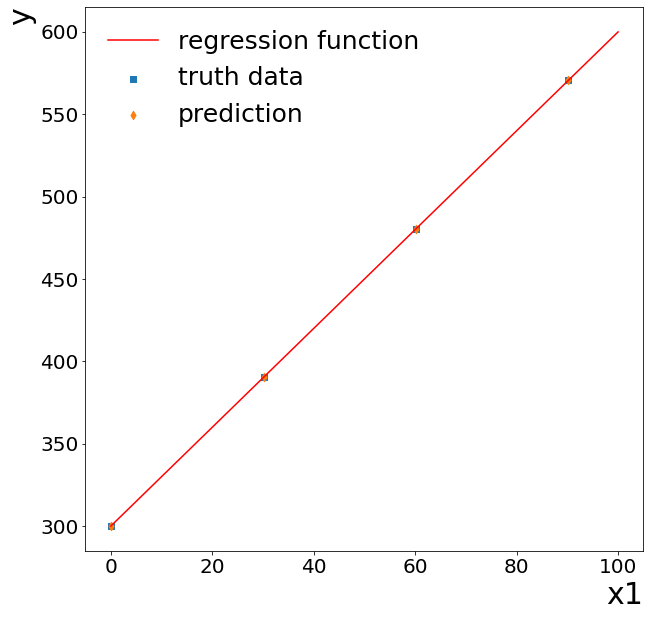

In [6]:
"""
We use the regression model in example 2 to predict data.
In the prediction stage, we should use test data to make prediction.
The test data are not used in training stage.
We will make a figure which contain regression function, pseudo data and prediction.
"""



"""
Make prediction
"""
wanted_point = np.arange(1,1000,300) #previous one is  np.arange(0,1000,100)
pseudo_prediction = pseudo_result_poly.predict(file['x1'][wanted_point][:, np.newaxis])



"""
visualize data in "x1" and "y" plane
"""

fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(pseudo_x_axis, pseudo_pred, 'r', label="regression function")
plt.scatter(file['x1'][wanted_point], file['y'][wanted_point], marker="s", label='truth data')
plt.scatter(file['x1'][wanted_point], pseudo_prediction, marker="d", label='prediction')

plt.xlabel("x1", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("y", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()

# Exercise 3

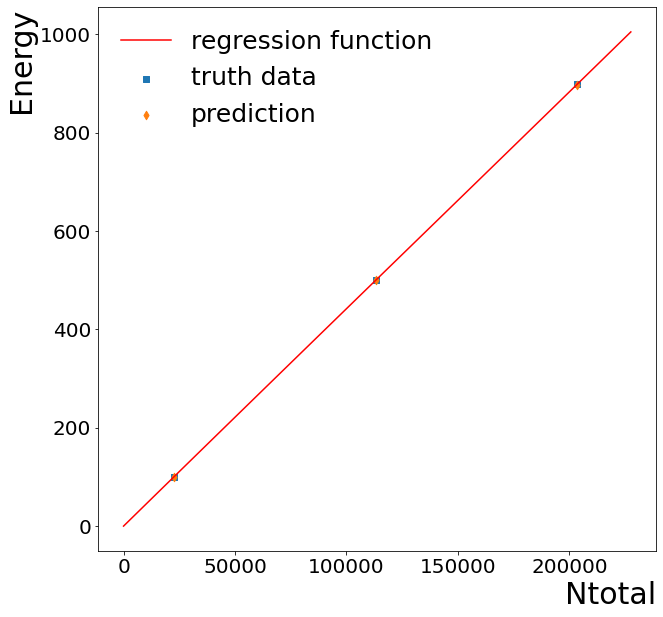

Quiz 03 is passed!
Please rise your hand and let TA check your figures! 


In [7]:
"""
Please select neutrino data in this element "np.arange(200,10000, 4000)" and make the prediction.
Please make a figure which contain regression function, neutrino data and prediction.
"""
################################################################################################################
#Your code in this section


"""
Make prediction
"""
wanted_point = np.arange(200,10000, 4000)
prediction = neutrino_result_poly.predict(neutrino_file["Ntotal"][wanted_point][:, np.newaxis])


"""
visualize data in "Ntotal" and "Energy" plane
"""
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.plot(ntotal_axis,neutrino_pred, 'r', label="regression function")
plt.scatter(neutrino_file['Ntotal'][wanted_point], neutrino_file['Energy'][wanted_point], marker="s", label='truth data')
plt.scatter(neutrino_file['Ntotal'][wanted_point], prediction, marker="d", label='prediction')

plt.xlabel("Ntotal", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("Energy", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()






################################################################################################################
# Check your result is correct or not.
assert int(prediction[0])%3 == 1, print(f"Your array is not match the request.")
assert int(prediction[1])%3 == 2, print(f"Your array is not match the request.")
assert int(prediction[2])%3 == 1, print(f"Your array is not match the request.")
print("Quiz 03 is passed!")
print("Please rise your hand and let TA check your figures! ")

# Example 4 

[ 3.00000000e+02  1.00579625e-05  2.83235525e-04  5.48453015e-03
 -1.16157892e-04  6.42842572e-07]


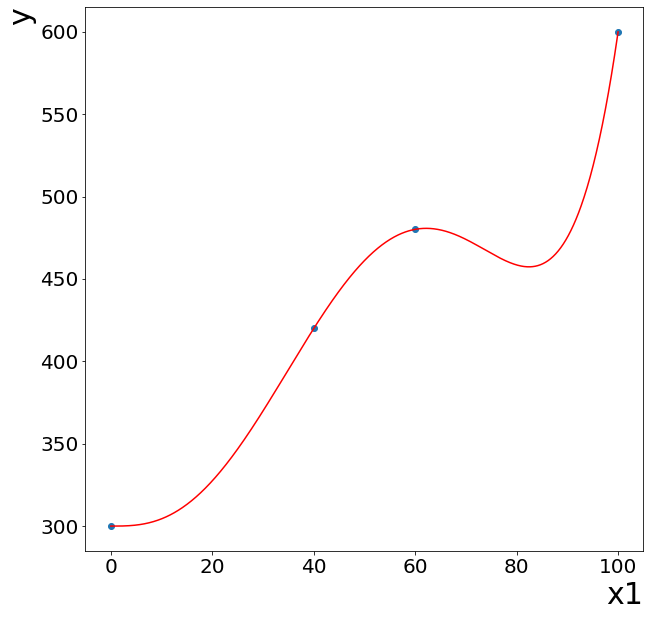

In [8]:
"""
You may notice that we let degree=3 in the previous example and excerise.
If we fit in higher order polynomial function, said degree=5, with insufficient data, our fitting result will be too much.
This issue is called: "Overfitting".
"""

model_poly = Pipeline([('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression(fit_intercept=False))])

"""
Pick some but not all data for fitting.
"""
wanted_point = [0,  400,  600, 999] # only 4 data points
pseudo_y = file["y"][wanted_point]
pseudo_x = file["x1"][wanted_point]


"""
Fit regression model
"""
result_poly = model_poly.fit(pseudo_x[:, np.newaxis], pseudo_y)

"""
Take coefficients
"""
pseudo_coef = result_poly.named_steps['linear'].coef_
print(pseudo_coef)
pseudo_x_axis = np.linspace(0,np.max(file["x1"]),1000) 
pred_poly = pseudo_coef[0]\
            + pseudo_x_axis*pseudo_coef[1]\
            + pseudo_coef[2]*pseudo_x_axis**2\
            + pseudo_coef[3]*pseudo_x_axis**3\
            + pseudo_coef[4]*pseudo_x_axis**4\
            + pseudo_coef[5]*pseudo_x_axis**5


"""
visualize data in "x1" and "y" plane
"""
fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(pseudo_x_axis, pred_poly, 'r')
plt.scatter(pseudo_x, pseudo_y)

plt.xlabel("x1", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("y", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()

# Exercise 4

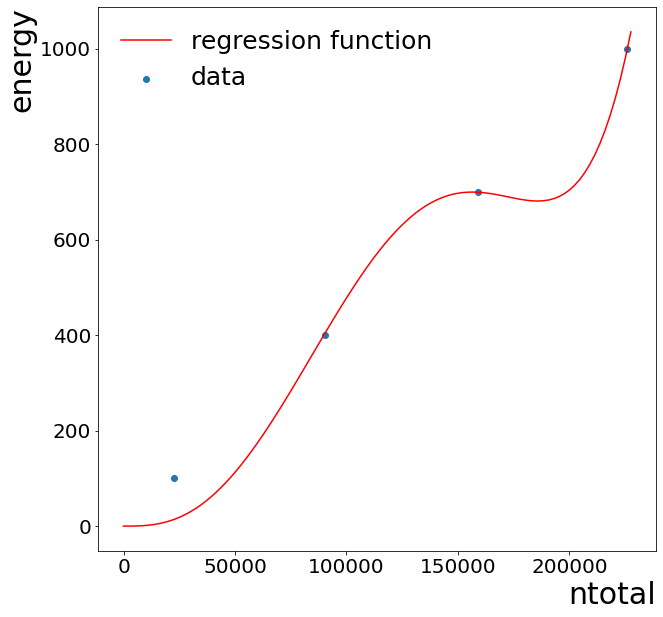

Quiz 04 is passed!
Please rise your hand and let TA check your figures! 


In [9]:
"""
Please set degree=5. Other setup is the same as Excerise 2.
Please pick events in No.101, No.3101, No.6101 and No.9101 for your fitting 
(e.g. file["features"][[100, 3100, 6100, 9100]])
"""
################################################################################################################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
#Your code in this section


"""
Using Pipeline to collect two regressions methods.
"""
model_poly = Pipeline([('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression(fit_intercept=False))])


"""
Pick some but not all data for fitting.
Please select "Ntotal" and "Energy" information for fitting.
"""
ntotal = neutrino_file["Ntotal"][[100, 3100, 6100, 9100]]
energy = neutrino_file["Energy"][[100, 3100, 6100, 9100]]



"""
Fit regression model
"""
neutrino_result_poly = model_poly.fit(ntotal[:, np.newaxis], energy)

"""
Take coefficients
"""
coef = neutrino_result_poly.named_steps['linear'].coef_
#print(coef)


"""
visualize data in "Ntotal" and "Energy" plane
"""
fig, ax = plt.subplots(1,1, figsize=(10,10))

ntotal_axis = np.linspace(0,np.max(neutrino_file["Ntotal"]),100) 
neutrino_pred = coef[0]\
       + ntotal_axis*coef[1]\
       + coef[2]*ntotal_axis**2\
       + coef[3]*ntotal_axis**3\
        + coef[4]*ntotal_axis**4\
        + coef[5]*ntotal_axis**5

plt.plot(ntotal_axis, neutrino_pred, 'r',label="regression function")
plt.scatter(ntotal, energy, label="data")

plt.xlabel("ntotal", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("energy", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()







################################################################################################################
# Check your result is correct or not.
assert coef[0]*(10**7) < 1, print(f"Your array is not match the request.")
assert coef[1]*(10**22) > 3, print(f"Your array is not match the request.")
assert coef[1]*(10**22) < 4, print(f"Your array is not match the request.")
print("Quiz 04 is passed!")
print("Please rise your hand and let TA check your figures! ")

# Example 5

Here, we want to introduce "LASSO" for model regularization.

The LASSO method is adding a L1 prior ($\alpha *||w||_1$) for regularization.

The optimization objective for Lasso is:

$$ (1 / (2 * n_{samples})) * ||y - Xw||^2_2 + \alpha * ||w||_1 $$

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1204.5471833521872, tolerance: 85.70739207676145
  positive)


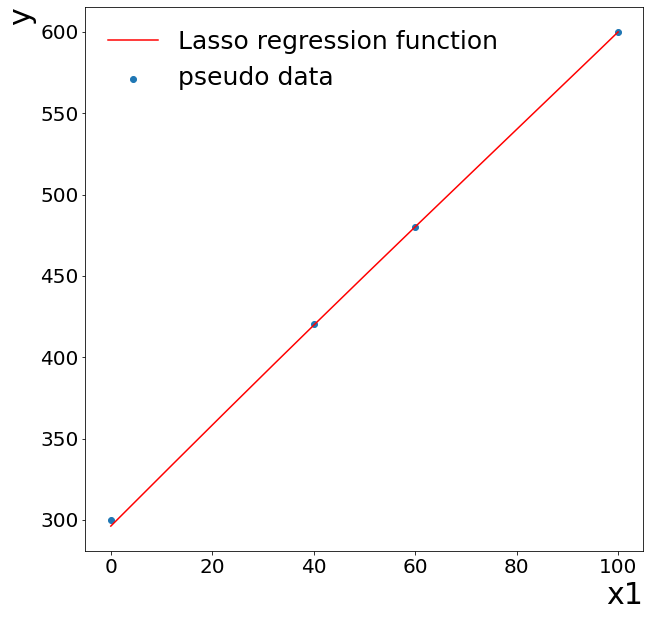

In [10]:
"""
We will learn how to implement the LASSO method based on the Sikit-learn package "sklearn.linear_model.Lasso" for regularization.
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso


pseudo_model_poly = Pipeline([('poly', PolynomialFeatures(degree=5)),
                ('linear', Lasso(alpha=1,fit_intercept=False))])

"""
Pick some but not all data for fitting.
"""
wanted_point = [0,  400,  600, 999] # only 4 data points
pseudo_y = file["y"][wanted_point]
pseudo_x = file["x1"][wanted_point]


"""
Fit regression model
"""
result_poly = pseudo_model_poly.fit(pseudo_x[:, np.newaxis], pseudo_y)

"""
Take coefficients
"""
pseudo_coef = result_poly.named_steps['linear'].coef_
pseudo_x_axis = np.linspace(0,np.max(file["x1"]),1000) 
pred_poly = pseudo_coef[0]\
            + pseudo_x_axis*pseudo_coef[1]\
            + pseudo_coef[2]*pseudo_x_axis**2\
            + pseudo_coef[3]*pseudo_x_axis**3\
            + pseudo_coef[4]*pseudo_x_axis**4\
            + pseudo_coef[5]*pseudo_x_axis**5


"""
visualize data in "x1" and "y" plane
"""
fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(pseudo_x_axis, pred_poly, 'r',label="Lasso regression function")
plt.scatter(pseudo_x, pseudo_y, label="pseudo data")

plt.xlabel("x1", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("y", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()




# Exercise 5

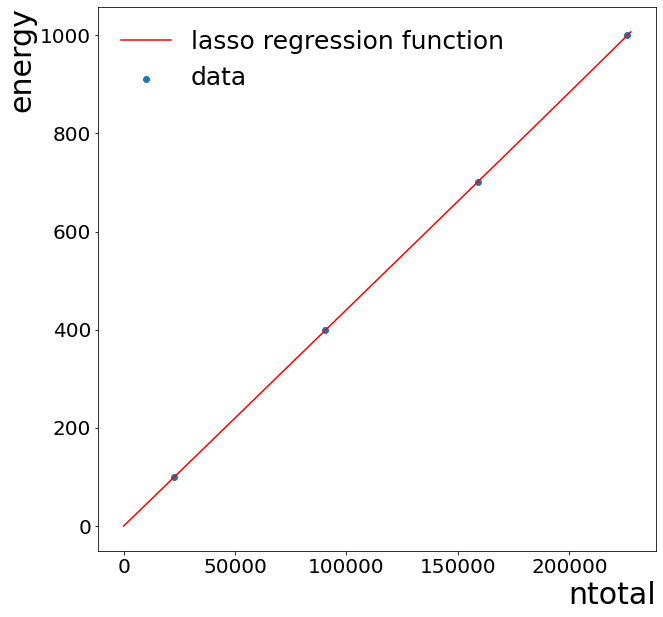

Quiz 05 is passed!
Please rise your hand and let TA check your figures! 


In [11]:
"""
Please implement the LASSO method in your regression precedure.
Please set degree=5 for "PolynomialFeatures".
Please pick events in No.101, No.3101, No.6101 and No.9101 for your fitting 
(e.g. file["features"][[100, 3100, 6100, 9100]])
"""
################################################################################################################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
#Your code in this section


"""
Using Pipeline to collect two regressions methods.
"""
model_poly = Pipeline([('poly',PolynomialFeatures(degree=5)),('linear',Lasso(alpha=1,fit_intercept=False))])
"""
Pick some but not all data for fitting.
Please select "Ntotal" and "Energy" information for fitting.
"""
wanted_point = [100, 3100, 6100, 9100]
ntotal = neutrino_file["Ntotal"][wanted_point]
energy = neutrino_file["Energy"][wanted_point]
"""
Fit regression model
"""
result_poly = model_poly.fit(ntotal[:, np.newaxis], energy)


"""
Take coefficients
"""
coef_Lasso = model_poly.named_steps['linear'].coef_

ntotal_axis = np.linspace(0,np.max(neutrino_file["Ntotal"]),100) 
lasso_pred = coef_Lasso[0]\
       + ntotal_axis*coef_Lasso[1]\
       + coef_Lasso[2]*ntotal_axis**2\
       + coef_Lasso[3]*ntotal_axis**3\
        + coef_Lasso[4]*ntotal_axis**4\
        + coef_Lasso[5]*ntotal_axis**5
"""
visualize data in "Ntotal" and "Energy" plane
"""


fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(ntotal_axis, lasso_pred, 'r',label="lasso regression function")
plt.scatter(ntotal, energy, label="data")

plt.xlabel("ntotal", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("energy", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()


################################################################################################################
# Check your result is correct or not.
assert int(coef_Lasso[0]*10)%3 == 0, print(f"Your array is not match the request.")
assert int(coef_Lasso[1]*1000)%3 == 1, print(f"Your array is not match the request.")
print("Quiz 05 is passed!")
print("Please rise your hand and let TA check your figures! ")

# Example 6

Here, we want to introduce "Ridge" for model regularization.

The Ridge method is adding a L2 prior ($\alpha * ||w||^2_2$) for regularization.

Minimizes the objective function:

$$ ||y - Xw||^2_2 + \alpha * ||w||^2_2 $$

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.83729e-20): result may not be accurate.
  overwrite_a=False)


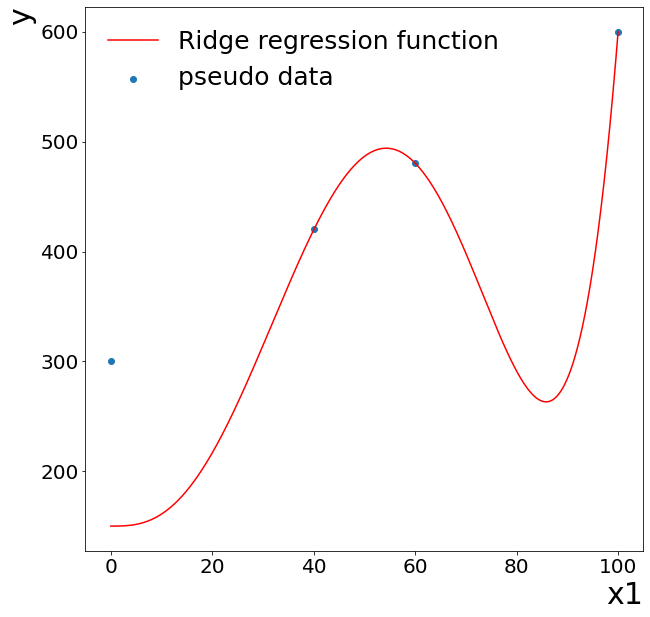

In [12]:
"""
We will learn how to implement the Ridge method based on the Sikit-learn package "sklearn.linear_model.Lasso" for regularization.
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


pseudo_model_poly = Pipeline([('poly', PolynomialFeatures(degree=5)),
                ('linear', Ridge(alpha=1,fit_intercept=False))])

"""
Pick some but not all data for fitting.
"""
wanted_point = [0,  400,  600, 999] # only 4 data points
pseudo_y = file["y"][wanted_point]
pseudo_x = file["x1"][wanted_point]


"""
Fit regression model
"""
result_poly = pseudo_model_poly.fit(pseudo_x[:, np.newaxis], pseudo_y)

"""
Take coefficients
"""
pseudo_coef = result_poly.named_steps['linear'].coef_
pseudo_x_axis = np.linspace(0,np.max(file["x1"]),1000) 
pred_poly = pseudo_coef[0]\
            + pseudo_x_axis*pseudo_coef[1]\
            + pseudo_coef[2]*pseudo_x_axis**2\
            + pseudo_coef[3]*pseudo_x_axis**3\
            + pseudo_coef[4]*pseudo_x_axis**4\
            + pseudo_coef[5]*pseudo_x_axis**5


"""
visualize data in "x1" and "y" plane
"""
fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(pseudo_x_axis, pred_poly, 'r',label="Ridge regression function")
plt.scatter(pseudo_x, pseudo_y, label="pseudo data")


plt.xlabel("x1", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("y", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()




# Exercise 6

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


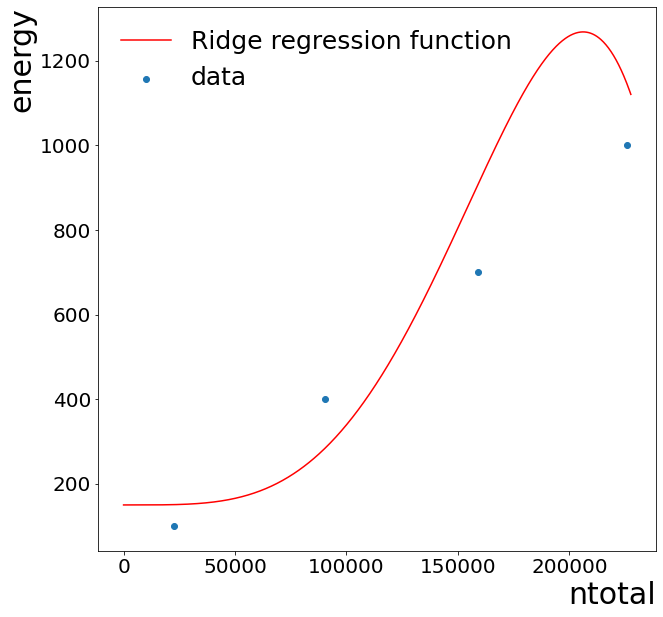

Quiz 06 is passed!
Please rise your hand and let TA check your figures! 


In [13]:
"""
Please implement the Ridge method in your regression precedure.
Please set degree=5 for "PolynomialFeatures".
Please pick events in No.101, No.3101, No.6101 and No.9101 for your fitting 
(e.g. file["features"][[100, 3100, 6100, 9100]])
"""
################################################################################################################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
#Your code in this section


"""
Using Pipeline to collect two regressions methods.
"""
model_poly = Pipeline([('poly', PolynomialFeatures(degree=5)),
                ('linear', Ridge(alpha=1,fit_intercept=False))])

"""
Pick some but not all data for fitting.
Please select "Ntotal" and "Energy" information for fitting.
"""
ntotal = neutrino_file["Ntotal"][[100, 3100, 6100, 9100]]
energy = neutrino_file["Energy"][[100, 3100, 6100, 9100]]

"""
Fit regression model
"""
poly = model_poly.fit(ntotal[:, np.newaxis], energy)

"""
Take coefficients
"""
coef_Ridge = poly.named_steps['linear'].coef_
ntotal_axis = np.linspace(0,np.max(neutrino_file["Ntotal"]),1000) 
pred_poly = pseudo_coef[0]\
            + ntotal_axis*coef_Ridge[1]\
            + coef_Ridge[2]*ntotal_axis**2\
            + coef_Ridge[3]*ntotal_axis**3\
            + coef_Ridge[4]*ntotal_axis**4\
            + coef_Ridge[5]*ntotal_axis**5

"""
visualize data in "Ntotal" and "Energy" plane
"""
fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.plot(ntotal_axis, pred_poly, 'r',label="Ridge regression function")
plt.scatter(ntotal, energy, label="data")


plt.xlabel("ntotal", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("energy", fontsize=30,horizontalalignment='right',y=1)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()







################################################################################################################
# Check your result is correct or not.
assert int(coef_Ridge[0]*10)%3 == 0, print(f"Your array is not match the request.")
assert int(coef_Ridge[1]*1000)%3 == 0, print(f"Your array is not match the request.")
print("Quiz 06 is passed!")
print("Please rise your hand and let TA check your figures! ")